In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("DATASETS/titanic/train.csv")
test=pd.read_csv("DATASETS/titanic/test.csv")

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
passenger_id=test["PassengerId"]

In [6]:
train=train.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
test=test.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)

In [7]:
train["Sex"]=train["Sex"].map({"male":0,"female":1})
test["Sex"]=test["Sex"].map({"male":0,"female":1})

In [8]:
train_embarked=pd.get_dummies(train["Embarked"],prefix="embarked",drop_first=True)
train_pclass=pd.get_dummies(train["Pclass"],prefix="pclass",drop_first=True)
train=pd.concat([train,train_embarked,train_pclass],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,3,0,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,1,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,1,0,0
4,0,3,0,35.0,0,0,8.0500,S,0,1,0,1


In [9]:
train=train.drop(["Pclass","Embarked"],axis=1)

In [10]:
test_embarked=pd.get_dummies(test["Embarked"],prefix="embarked",drop_first=True)
test_pclass=pd.get_dummies(test["Pclass"],prefix="pclass",drop_first=True)
test=pd.concat([test,test_embarked,test_pclass],axis=1)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_Q,embarked_S,pclass_2,pclass_3
0,3,0,34.5,0,0,7.8292,Q,1,0,0,1
1,3,1,47.0,1,0,7.0000,S,0,1,0,1
2,2,0,62.0,0,0,9.6875,Q,1,0,1,0
3,3,0,27.0,0,0,8.6625,S,0,1,0,1
4,3,1,22.0,1,1,12.2875,S,0,1,0,1


In [11]:
test=test.drop(["Pclass","Embarked"],axis=1)

In [12]:
test.head()

,Sex,Age,SibSp,Parch,Fare,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,34.5,0,0,7.8292,1,0,0,1
1,1,47.0,1,0,7.0000,0,1,0,1
2,0,62.0,0,0,9.6875,1,0,1,0
3,0,27.0,0,0,8.6625,0,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,1


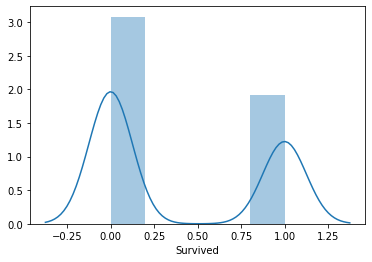

In [13]:
sns.distplot(train["Survived"],kde=True)

In [14]:
train=train.fillna(train["Age"].mean())
test=test.fillna(test["Age"].mean())

In [15]:
data=train.drop("Survived",axis=1)
target=train["Survived"]

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
parameter={"C":[1,0.1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(),parameter,verbose=1)
grid.fit(data,target)

/home/hardik/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    5.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 0.1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [18]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [19]:
svm=SVC(C=100,gamma=0.001)

In [20]:
svm.fit(data,target)
predict_y=svm.predict(test)

In [22]:
#converting into csv
p_id=pd.Series(passenger_id,name="PassengerId")
surv= pd.Series(predict_y,name="Survived")
results = pd.concat([p_id,surv],axis=1)

results.to_csv("survived_svm.csv",index=False)